https://bit.ly/RSML-2-content

## Датасет

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
!wget 'https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx' -O MovieLens.zip

--2023-02-20 07:00:44--  https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx
Resolving drive.google.com (drive.google.com)... 74.125.204.102, 74.125.204.113, 74.125.204.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/936q9u5q9kd0lj5tv8need19qcg8ndsq/1676876400000/02611596255248067438/*/1m0rwReR09achL0xTM6QPoN4tykz5bOMx?uuid=121463ed-844a-4b43-a06f-ee27d6d1e8e5 [following]
--2023-02-20 07:00:45--  https://doc-0g-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/936q9u5q9kd0lj5tv8need19qcg8ndsq/1676876400000/02611596255248067438/*/1m0rwReR09achL0xTM6QPoN4tykz5bOMx?uuid=121463ed-844a-4b43-a06f-ee27d6d1e8e5
Resolving doc-0g-84-docs.googleusercontent.com (doc-0g-84-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-0g-

In [ ]:
!unzip MovieLens.zip

Archive:  MovieLens.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


In [ ]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Пользователи

In [ ]:
grouped_users = tags['userId'].value_counts()
grouped_users

474    1507
567     432
62      370
599     323
477     280
424     273
537     100
125      48
357      45
318      41
184      35
573      31
193      20
18       16
119      14
336      10
2         9
305       8
606       7
327       7
166       6
419       5
103       5
356       5
462       5
21        4
132       4
289       4
291       4
435       4
439       3
177       3
487       3
506       3
513       3
533       3
49        3
509       3
112       3
610       3
205       3
226       3
319       3
341       2
256       2
63        2
76        2
520       2
106       2
138       2
288       1
274       1
300       1
543       1
7         1
161       1
600       1
167       1
Name: userId, dtype: int64

In [ ]:
len(grouped_users)

58

In [ ]:
grouped_users.median()

4.0

In [ ]:
grouped_users.mean()

63.5

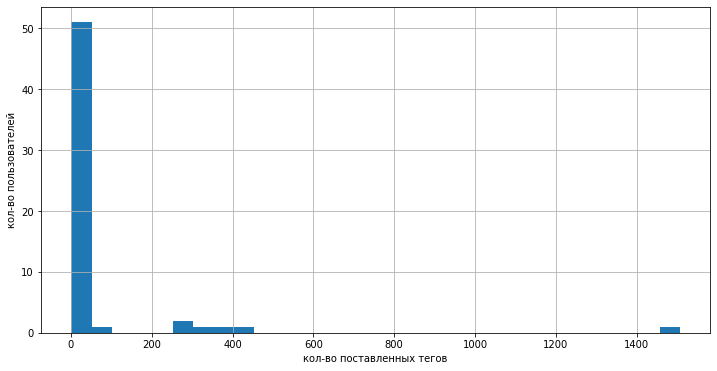

In [ ]:
plt.figure(figsize=(12, 6))
grouped_users.hist(bins=30)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('кол-во пользователей');

### Фильмы

In [ ]:
grouped_movies = tags['movieId'].value_counts()
grouped_movies

296     181
2959     54
924      41
293      35
7361     34
       ... 
3307      1
3310      1
3317      1
830       1
2719      1
Name: movieId, Length: 1572, dtype: int64

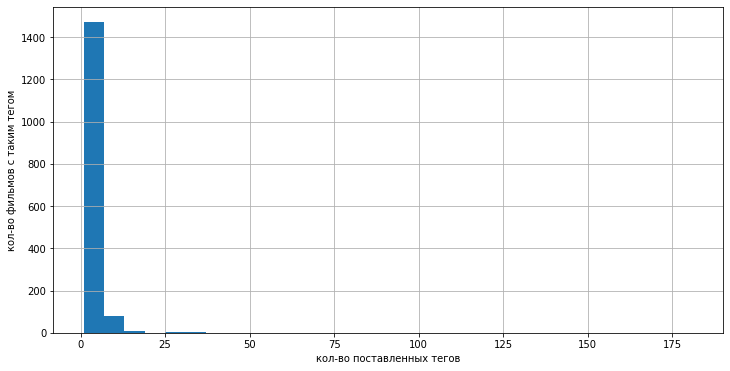

In [ ]:
plt.figure(figsize=(12, 6))
grouped_movies.hist(bins=30)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('кол-во фильмов с таким тегом');

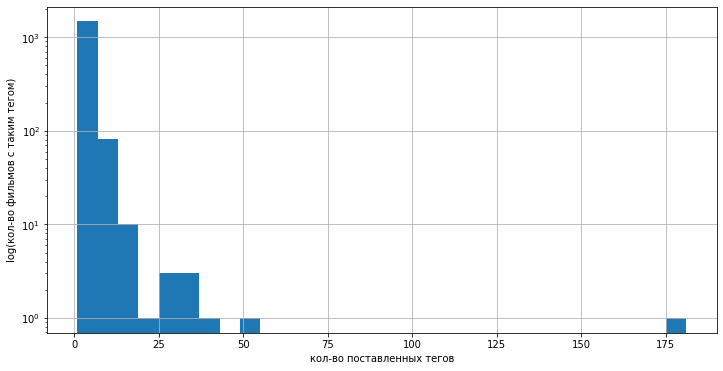

In [ ]:
plt.figure(figsize=(12, 6))
grouped_movies.hist(bins=30, log=True)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('log(кол-во фильмов с таким тегом)');

In [ ]:
tags[tags['movieId'] == 296]

,userId,movieId,tag,timestamp
409,103,296,good dialogue,1431954555
410,103,296,great soundtrack,1431954555
411,103,296,non-linear,1431954555
726,424,296,cult film,1457844546
727,424,296,drugs,1457844550
...,...,...,...,...
3549,599,296,unusual,1498456642
3550,599,296,very funny,1498456434
3551,599,296,violence,1498456347
3552,599,296,violent,1498456366


In [ ]:
movies[movies['movieId'] == 296]

,movieId,title,genres
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [ ]:
grouped_movies.mean()

2.3428753180661577

In [ ]:
grouped_movies.median()

1.0

### Дата

In [ ]:
tags['dt'] = tags['timestamp'].apply(lambda t: datetime.fromtimestamp(t))
tags.head()

,userId,movieId,tag,timestamp,dt
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


In [ ]:
tags['year'] = tags['dt'].dt.year
tags['month'] = tags['dt'].dt.month

In [ ]:
tags['year_month'] = tags['year'].astype(str) + '-' + tags['month'].astype(str)
tags.head()

,userId,movieId,tag,timestamp,dt,year,month,year_month
0,2,60756,funny,1445714994,2015-10-24 19:29:54,2015,10,2015-10
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56,2015,10,2015-10
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52,2015,10,2015-10
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27,2015,10,2015-10
4,2,89774,MMA,1445715200,2015-10-24 19:33:20,2015,10,2015-10


In [ ]:
grouped_date = tags['year_month'].value_counts()[:30]
grouped_date[:30]

2006-1     1462
2018-5      670
2017-6      323
2016-3      280
2015-2      109
2018-6      101
2009-5       87
2010-1       62
2009-6       52
2016-9       48
2018-9       46
2012-9       45
2006-2       39
2015-7       37
2010-3       35
2007-8       31
2018-7       21
2010-7       13
2006-3       13
2010-2       12
2015-10       9
2015-1        9
2009-9        9
2010-8        9
2006-10       9
2006-4        7
2015-8        7
2016-5        7
2009-2        7
2011-3        6
Name: year_month, dtype: int64

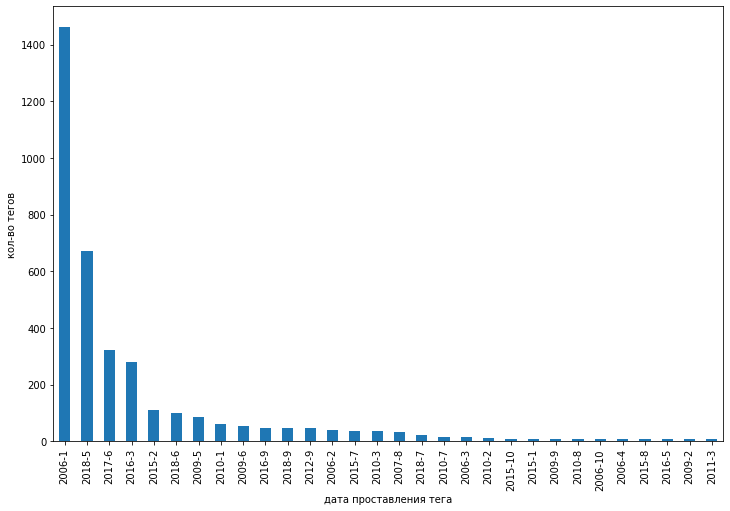

In [ ]:
plt.figure(figsize=(12, 8))
grouped_date.plot.bar()
plt.xlabel('дата проставления тега')
plt.ylabel('кол-во тегов');

### Жанры

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies['num_generes'] = movies['genres'].apply(lambda x: len(x.split('|')))
movies.head()

,movieId,title,genres,num_generes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [ ]:
movies.sort_values('num_generes', ascending=False).head()

,movieId,title,genres,num_generes
7441,81132,Rubber (2010),Action|Adventure|Comedy|Crime|Drama|Film-Noir|...,10
5556,26701,Patlabor: The Movie (Kidô keisatsu patorebâ: T...,Action|Animation|Crime|Drama|Film-Noir|Mystery...,8
6626,56152,Enchanted (2007),Adventure|Animation|Children|Comedy|Fantasy|Mu...,7
2250,2987,Who Framed Roger Rabbit? (1988),Adventure|Animation|Children|Comedy|Crime|Fant...,7
5819,32031,Robots (2005),Adventure|Animation|Children|Comedy|Fantasy|Sc...,7


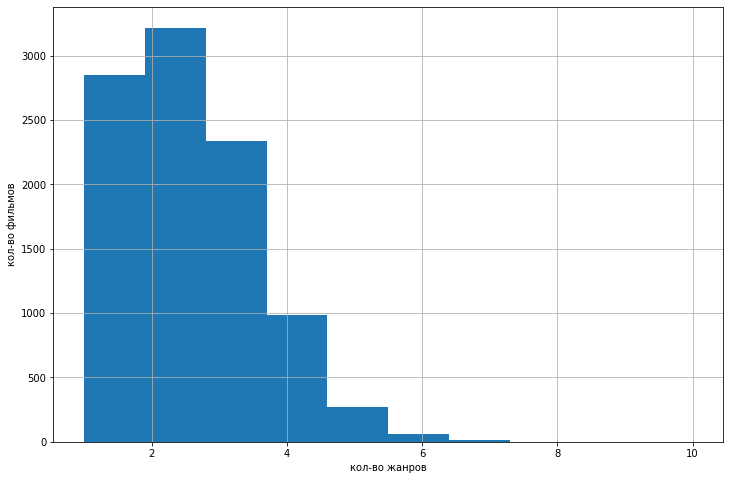

In [ ]:
plt.figure(figsize=(12, 8))
movies['num_generes'].hist(bins=10)
plt.xlabel('кол-во жанров')
plt.ylabel('кол-во фильмов');

In [ ]:
np.mean(movies['num_generes'])

2.2668856497639087

In [ ]:
np.median(movies['num_generes'])

2.0

## Рекомендации к фильму

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [ ]:
movies.head()

,movieId,title,genres,num_generes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [ ]:
def change_string(s):
    return ' '.join(s.replace(' ', '').replace('-', '').split('|'))

In [ ]:
movie_genres = [change_string(g) for g in movies.genres.values]
movie_genres[:10]

['Adventure Animation Children Comedy Fantasy',
 'Adventure Children Fantasy',
 'Comedy Romance',
 'Comedy Drama Romance',
 'Comedy',
 'Action Crime Thriller',
 'Comedy Romance',
 'Adventure Children',
 'Action',
 'Action Adventure Thriller']

### Преобразование данных в векторы

In [ ]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(movie_genres)
X_train_tfidf

<9742x20 sparse matrix of type '<class 'numpy.float64'>'
	with 22084 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,filmnoir,horror,imax,musical,mystery,nogenreslisted,romance,scifi,thriller,war,western
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Найдем ближайших соседей

In [ ]:
neigh = NearestNeighbors(n_neighbors=7, metric='euclidean') 
neigh.fit(X_train_tfidf)

NearestNeighbors(metric='euclidean', n_neighbors=7)

In [ ]:
test = change_string("Adventure|Comedy|Fantasy|Documentary")

X_tfidf = tfidf.transform([test])

res = neigh.kneighbors(X_tfidf, return_distance=True)

In [ ]:
res

(array([[0.38758619, 0.56525059, 0.58114553, 0.65617877, 0.65617877,
         0.66834044, 0.66834044]]),
 array([[8014, 5836, 8161, 4853, 7597, 5636, 5627]]))

In [ ]:
movies.iloc[res[1][0]]

,movieId,title,genres,num_generes
8014,97757,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,5
5836,32314,Incident at Loch Ness (2004),Adventure|Comedy|Documentary,3
8161,102590,Darkon (2006),Documentary|Fantasy,2
4853,7256,Touching the Void (2003),Adventure|Documentary,2
7597,86593,African Cats (2011),Adventure|Documentary,2
5636,27368,Asterix & Obelix: Mission Cleopatra (Astérix &...,Adventure|Comedy|Fantasy,3
5627,27251,"10th Kingdom, The (2000)",Adventure|Comedy|Fantasy,3


In [ ]:
movies_with_tags = movies.merge(tags, on='movieId')
movies_with_tags.head()

,movieId,title,genres,num_generes,userId,tag,timestamp,dt,year,month,year_month
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,336,pixar,1139045764,2006-02-04 09:36:04,2006,2,2006-2
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,474,pixar,1137206825,2006-01-14 02:47:05,2006,1,2006-1
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,567,fun,1525286013,2018-05-02 18:33:33,2018,5,2018-5
3,2,Jumanji (1995),Adventure|Children|Fantasy,3,62,fantasy,1528843929,2018-06-12 22:52:09,2018,6,2018-6
4,2,Jumanji (1995),Adventure|Children|Fantasy,3,62,magic board game,1528843932,2018-06-12 22:52:12,2018,6,2018-6


### Преобразуем теги в векторы

In [ ]:
movies_with_tags[movies_with_tags.title == 'Toy Story (1995)']

,movieId,title,genres,num_generes,userId,tag,timestamp,dt,year,month,year_month
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,336,pixar,1139045764,2006-02-04 09:36:04,2006,2,2006-2
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,474,pixar,1137206825,2006-01-14 02:47:05,2006,1,2006-1
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,567,fun,1525286013,2018-05-02 18:33:33,2018,5,2018-5


In [ ]:
movies_with_tags.tag.unique()

array(['pixar', 'fun', 'fantasy', ..., 'star wars', 'gintama', 'remaster'],
      dtype=object)

In [ ]:
movies_with_tags.tag.unique().shape

(1589,)

In [ ]:
movies_with_tags.dropna(inplace=True)

In [ ]:
movies_with_tags.title.unique().shape

(1572,)

In [ ]:
def change_string(s):
    return str(s).replace(' ', '').replace('-', '').lower()

tag_strings = []
movies = []

for movie, group in tqdm(movies_with_tags.groupby('title')):
    tag_strings.append(' '.join([change_string(s) for s in group.tag.values]))
    movies.append(movie)

  0%|          | 0/1572 [00:00<?, ?it/s]

In [ ]:
tag_strings[:10]

['artistic funny humorous inspiring intelligent quirky romance zooeydeschanel',
 'lawyers',
 'creepy suspense',
 'shakespearesortof',
 'dogs remake',
 'disney',
 'terrorism',
 'court claustrophobic confrontational earnest gooddialogue greatscreenplay gritty motivational thoughtprovoking',
 'stranded',
 'markruffalo']

In [ ]:
movies_with_tags[movies_with_tags['title'] == '(500) Days of Summer (2009)']

,movieId,title,genres,num_generes,userId,tag,timestamp,dt,year,month,year_month
3078,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,artistic,1279956134,2010-07-24 07:22:14,2010,7,2010-7
3079,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,Funny,1279956141,2010-07-24 07:22:21,2010,7,2010-7
3080,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,humorous,1279956124,2010-07-24 07:22:04,2010,7,2010-7
3081,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,inspiring,1279956130,2010-07-24 07:22:10,2010,7,2010-7
3082,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,intelligent,1279956132,2010-07-24 07:22:12,2010,7,2010-7
3083,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,quirky,1279956145,2010-07-24 07:22:25,2010,7,2010-7
3084,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,romance,1279956123,2010-07-24 07:22:03,2010,7,2010-7
3085,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,Zooey Deschanel,1279956120,2010-07-24 07:22:00,2010,7,2010-7


In [ ]:
tfidf_tag = TfidfVectorizer()
X_train_tfidf_tag = tfidf_tag.fit_transform(tag_strings)
X_train_tfidf_tag

<1572x1472 sparse matrix of type '<class 'numpy.float64'>'
	with 3598 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X_train_tfidf_tag.toarray(), columns=tfidf_tag.get_feature_names_out())

,06oscarnominatedbestmovieanimation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001like,2danimation,...,worldwari,worldwarii,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420342
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Найдем ближайших соседей

In [ ]:
neigh_tag = NearestNeighbors(n_neighbors=10, p=1) 
neigh_tag.fit(X_train_tfidf_tag)

NearestNeighbors(n_neighbors=10, p=1)

In [ ]:
test = 'highschool pixar fun'

X_tfidf_tag = tfidf_tag.transform([test])

res = neigh_tag.kneighbors(X_tfidf_tag, return_distance=True)

In [ ]:
res

(array([[0.95532444, 1.49356676, 1.52685966, 1.70596435, 1.70596435,
         1.70596435, 1.70596435, 1.70596435, 1.70596435, 1.70596435]]),
 array([[1432,  211,  565,  940,  439,  590,  336,  951,  432,  546]]))

In [ ]:
for i in res[1][0]:
    print(movies[i], tag_strings[i])

Toy Story (1995) pixar pixar fun
Bug's Life, A (1998) pixar
Guardians of the Galaxy 2 (2017) fun
Napoleon Dynamite (2004) highschool
Ferris Bueller's Day Off (1986) highschool
Heathers (1989) highschool
Dead Poets Society (1989) highschool highschool
Never Been Kissed (1999) highschool
Fast Times at Ridgemont High (1982) highschool
Grease (1978) highschool
